## Problem Statement

The instances were drawn randomly from a database of 7 outdoor images. The images were hand-segmented to create a classification for every pixel.

Each instance is a 3 pixel x 3 pixel region (9 pixels). 

Your task is to predict the probability that each 3x3 image region belongs to each of the seven classes (window, foliage, brickface, sky, grass, path, cement).

For each unique 3x3 region you should provide 7 probabilities with value between 0 and 1.


### Import packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as skl
import seaborn as sns


## Import Dataset

In [2]:
#import csv and read it as a dataframe
image_test_df=pd.read_csv('../cmu_data/test.csv', sep=',')
image_train_df=pd.read_csv('../cmu_data/train.csv', sep=',')

## EDA

### Test.csv

In [9]:
image_test_df.head(10)

,id,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0,105,110,9,0.000000,0.0,0.500000,0.122222,1.944444,2.374073,4.222222,4.333334,6.333334,2.000000,0.333333,6.333334,-6.666666,6.333334,0.708333,-1.539762
1,1,36,189,9,0.000000,0.0,1.944444,2.462961,5.833334,21.588884,31.370370,28.444445,38.000000,27.666666,-8.777778,19.888890,-11.111111,38.000000,0.266302,-2.020345
2,2,252,71,9,0.000000,0.0,0.722221,0.329628,1.333333,0.711110,89.148150,72.777780,115.555560,79.111115,-49.111110,79.222220,-30.111110,115.555560,0.370097,-2.249475
3,3,10,61,9,0.111111,0.0,2.222222,3.185182,3.111111,7.185185,18.962963,18.666668,24.222221,14.000000,-0.888889,15.777778,-14.888889,24.222221,0.419522,-1.591206
4,4,7,18,9,0.000000,0.0,1.277779,0.729627,0.944445,0.374079,138.629620,133.333340,147.555560,135.000000,-15.888889,26.777779,-10.888889,147.555560,0.096352,-2.214612
5,5,164,83,9,0.111111,0.0,2.500000,6.077768,1.555556,0.785184,66.259260,60.222220,79.666670,58.888890,-18.111110,40.222220,-22.111110,79.666670,0.260329,-2.027771
6,6,187,36,9,0.000000,0.0,0.388889,0.250924,0.500000,0.278887,7.518518,4.777778,13.000000,4.777778,-8.222222,16.444445,-8.222222,13.000000,0.648657,-2.097293
7,7,239,122,9,0.000000,0.0,0.277778,0.062963,0.333333,0.177778,5.555555,7.000000,6.666666,3.000000,4.333334,3.333333,-7.666666,7.222222,0.581349,-0.953435
8,8,254,73,9,0.000000,0.0,6.666666,7.865538,9.444445,12.330030,34.703705,20.555555,57.333332,26.222221,-42.444443,67.888885,-25.444445,57.333332,0.651133,-2.255561
9,9,181,87,9,0.000000,0.0,1.222224,0.474069,0.777779,0.207406,135.407410,127.888885,146.444440,131.888890,-22.555555,33.111110,-10.555555,146.444440,0.126571,-2.312874


In [10]:
image_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 20 columns):
id                      2100 non-null int64
REGION-CENTROID-COL     2100 non-null int64
REGION-CENTROID-ROW     2100 non-null int64
REGION-PIXEL-COUNT      2100 non-null int64
SHORT-LINE-DENSITY-5    2100 non-null float64
SHORT-LINE-DENSITY-2    2100 non-null float64
VEDGE-MEAN              2100 non-null float64
VEDGE-SD                2100 non-null float64
HEDGE-MEAN              2100 non-null float64
HEDGE-SD                2100 non-null float64
INTENSITY-MEAN          2100 non-null float64
RAWRED-MEAN             2100 non-null float64
RAWBLUE-MEAN            2100 non-null float64
RAWGREEN-MEAN           2100 non-null float64
EXRED-MEAN              2100 non-null float64
EXBLUE-MEAN             2100 non-null float64
EXGREEN-MEAN            2100 non-null float64
VALUE-MEAN              2100 non-null float64
SATURATION-MEAN         2100 non-null float64
HUE-MEAN                210

In [11]:
image_test_df.describe()

,id,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2100.000000,2100.000000,2100.000000,2100.0,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,1049.500000,124.940476,123.483333,9.0,0.014921,0.004550,1.890820,5.708299,2.406772,7.904224e+00,37.047654,32.806667,44.205556,34.130741,-12.722963,21.473704,-8.750741,45.162381,0.427259,-1.365147
std,606.362103,72.858637,57.431428,0.0,0.041024,0.023573,2.649453,44.989359,3.469954,5.347107e+01,38.135291,34.994538,43.510119,36.303768,11.588214,19.654107,11.606996,42.900582,0.228458,1.544278
min,0.000000,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.590000e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,524.750000,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.349603,0.833332,4.216377e-01,7.472222,7.000000,9.666667,6.222222,-18.583333,4.305556,-17.000000,11.777778,0.284934,-2.188539
50%,1049.500000,121.000000,122.000000,9.0,0.000000,0.000000,1.277776,0.833333,1.444444,9.897442e-01,21.666666,19.666668,27.777779,20.444445,-10.888889,19.666666,-11.000000,28.666666,0.375064,-2.052625
75%,1574.250000,188.250000,171.250000,9.0,0.000000,0.000000,2.222221,1.807406,2.555556,2.251852e+00,53.277778,47.333332,65.000000,46.388888,-4.222222,36.111110,-3.222222,65.000000,0.540228,-1.565745
max,2099.000000,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


In [12]:
image_test_df.shape


(2100, 20)

In [13]:
image_test_df.count()

id                      2100
REGION-CENTROID-COL     2100
REGION-CENTROID-ROW     2100
REGION-PIXEL-COUNT      2100
SHORT-LINE-DENSITY-5    2100
SHORT-LINE-DENSITY-2    2100
VEDGE-MEAN              2100
VEDGE-SD                2100
HEDGE-MEAN              2100
HEDGE-SD                2100
INTENSITY-MEAN          2100
RAWRED-MEAN             2100
RAWBLUE-MEAN            2100
RAWGREEN-MEAN           2100
EXRED-MEAN              2100
EXBLUE-MEAN             2100
EXGREEN-MEAN            2100
VALUE-MEAN              2100
SATURATION-MEAN         2100
HUE-MEAN                2100
dtype: int64

## check for Nan

In [14]:
image_test_df.isnull().any()

id                      False
REGION-CENTROID-COL     False
REGION-CENTROID-ROW     False
REGION-PIXEL-COUNT      False
SHORT-LINE-DENSITY-5    False
SHORT-LINE-DENSITY-2    False
VEDGE-MEAN              False
VEDGE-SD                False
HEDGE-MEAN              False
HEDGE-SD                False
INTENSITY-MEAN          False
RAWRED-MEAN             False
RAWBLUE-MEAN            False
RAWGREEN-MEAN           False
EXRED-MEAN              False
EXBLUE-MEAN             False
EXGREEN-MEAN            False
VALUE-MEAN              False
SATURATION-MEAN         False
HUE-MEAN                False
dtype: bool

In [15]:
image_test_df.corr()

,id,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
id,1.000000,0.023195,-0.012410,NaN,-0.003094,-0.017932,-0.000397,0.012693,-0.037606,-0.023811,-0.004502,-0.005023,-0.003983,-0.004573,-0.001053,-0.000247,0.001469,-0.004236,-0.012300,-0.003355
REGION-CENTROID-COL,0.023195,1.000000,0.021115,NaN,-0.048088,-0.003448,-0.003043,0.032893,-0.010776,0.010001,0.063692,0.059320,0.062584,0.068527,-0.091395,0.044899,0.015220,0.064662,-0.107226,0.038136
REGION-CENTROID-ROW,-0.012410,0.021115,1.000000,NaN,0.057781,0.044630,0.027878,-0.053462,0.115810,-0.018819,-0.464687,-0.467181,-0.481601,-0.436859,0.355238,-0.493568,0.481096,-0.458177,0.083261,0.592500
REGION-PIXEL-COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHORT-LINE-DENSITY-5,-0.003094,-0.048088,0.057781,NaN,1.000000,-0.021583,-0.019855,-0.033317,-0.021006,-0.040218,-0.019914,-0.018077,-0.022782,-0.018028,0.032835,-0.035382,0.027130,-0.017559,-0.042157,0.105853
SHORT-LINE-DENSITY-2,-0.017932,-0.003448,0.044630,NaN,-0.021583,1.000000,0.245888,0.190272,0.286555,0.245607,-0.017532,-0.022947,-0.008058,-0.023472,-0.034804,0.048537,-0.047441,-0.011304,0.029233,-0.079683
VEDGE-MEAN,-0.000397,-0.003043,0.027878,NaN,-0.019855,0.245888,1.000000,0.645167,0.542281,0.487143,-0.000577,-0.011085,0.014921,-0.009016,-0.094727,0.102454,-0.078911,0.012533,-0.061904,-0.096855
VEDGE-SD,0.012693,0.032893,-0.053462,NaN,-0.033317,0.190272,0.645167,1.000000,0.455123,0.681719,-0.000062,-0.004933,0.003661,0.000172,-0.044078,0.024676,0.002223,0.001622,0.003691,-0.061239
HEDGE-MEAN,-0.037606,-0.010776,0.115810,NaN,-0.021006,0.286555,0.542281,0.455123,1.000000,0.670740,0.029960,0.022164,0.040336,0.024708,-0.094991,0.093489,-0.063467,0.038693,-0.125861,-0.094024
HEDGE-SD,-0.023811,0.010001,-0.018819,NaN,-0.040218,0.245607,0.487143,0.681719,0.670740,1.000000,0.008537,0.003539,0.012219,0.008846,-0.052219,0.031461,-0.001139,0.010020,-0.022600,-0.072477


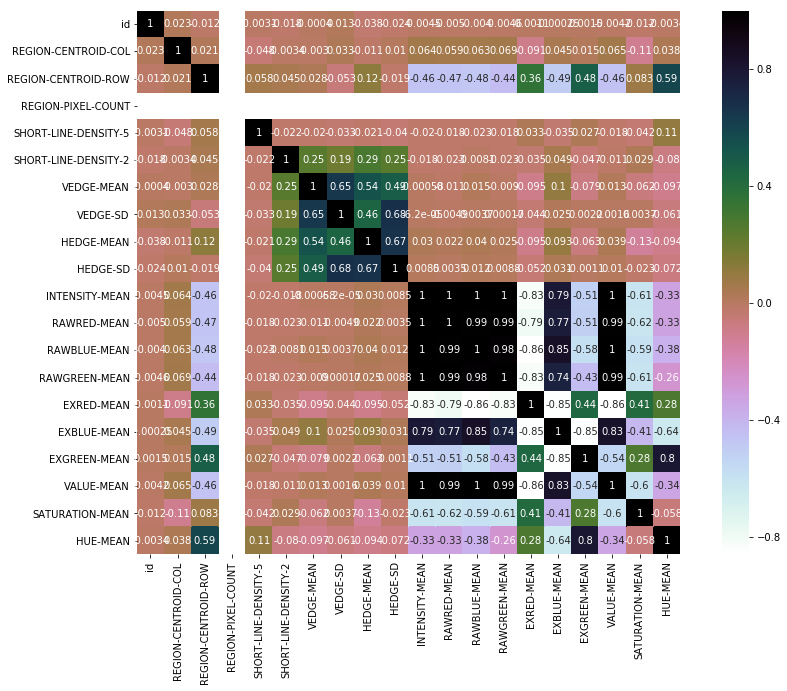

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(image_test_df.corr(), vmax=1, annot=True, square=True, cmap='cubehelix_r')

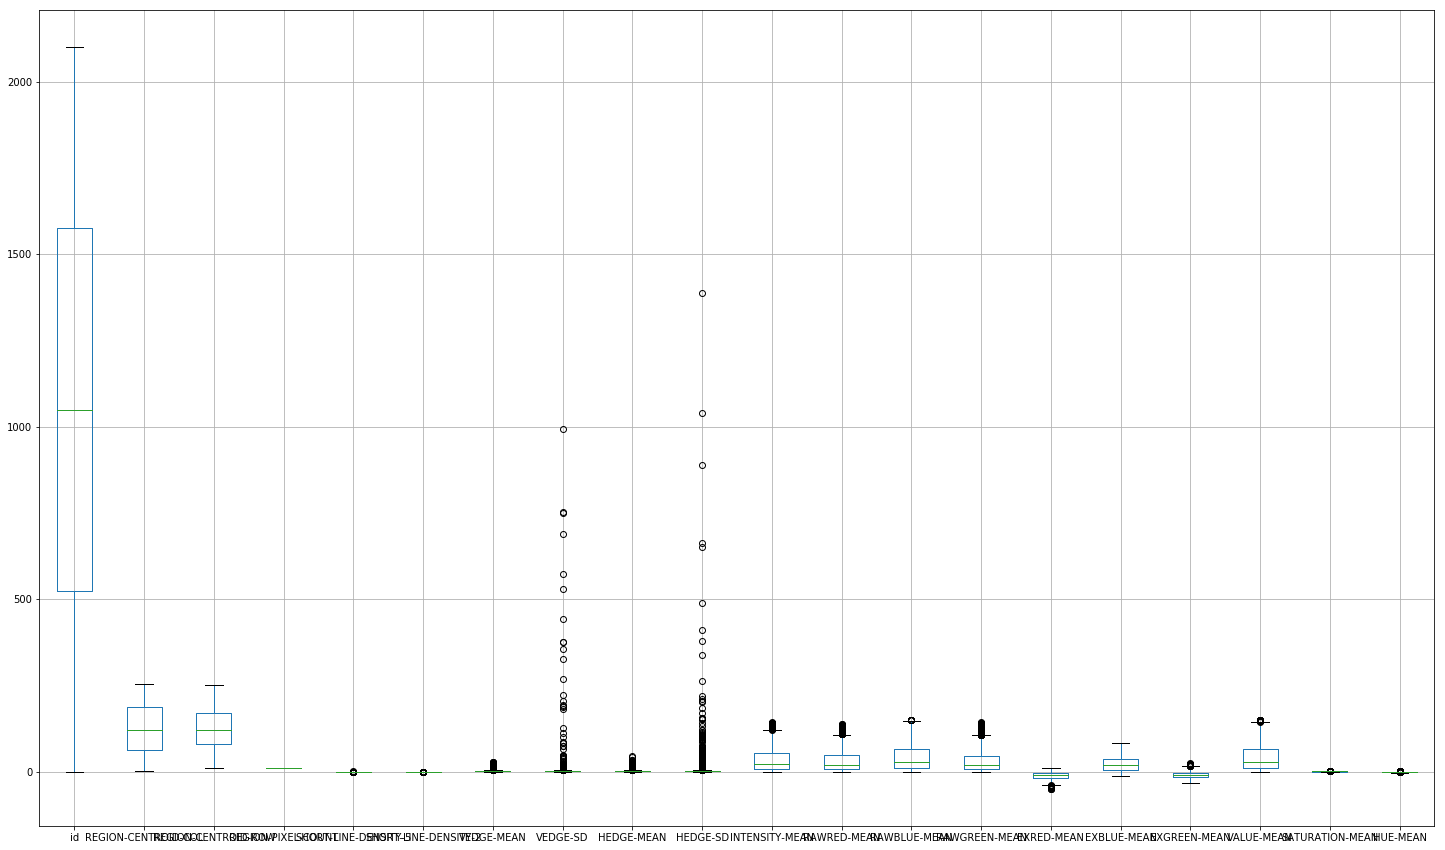

In [17]:
image_test_df.boxplot(figsize=(25,15))

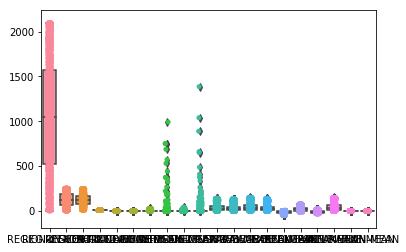

In [18]:
##sns.set(font_scale=1.5, rc={'figure.figsize':(12, 10)})
sns.boxplot(data=image_test_df)

sns.stripplot(data=image_test_df, jitter=True, edgecolor="gray")
plt.rcParams['figure.figsize'] = (20, 15)

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


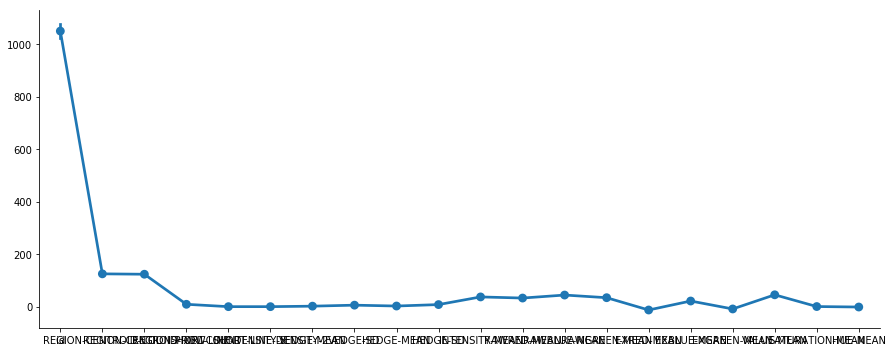

In [19]:
axes = sns.factorplot(data=image_test_df, aspect = 2.5, )

In [20]:
image_test_df.columns.tolist()

['id',
 'REGION-CENTROID-COL',
 'REGION-CENTROID-ROW',
 'REGION-PIXEL-COUNT',
 'SHORT-LINE-DENSITY-5',
 'SHORT-LINE-DENSITY-2',
 'VEDGE-MEAN',
 'VEDGE-SD',
 'HEDGE-MEAN',
 'HEDGE-SD',
 'INTENSITY-MEAN',
 'RAWRED-MEAN',
 'RAWBLUE-MEAN',
 'RAWGREEN-MEAN',
 'EXRED-MEAN',
 'EXBLUE-MEAN',
 'EXGREEN-MEAN',
 'VALUE-MEAN',
 'SATURATION-MEAN',
 'HUE-MEAN']

## check outliers

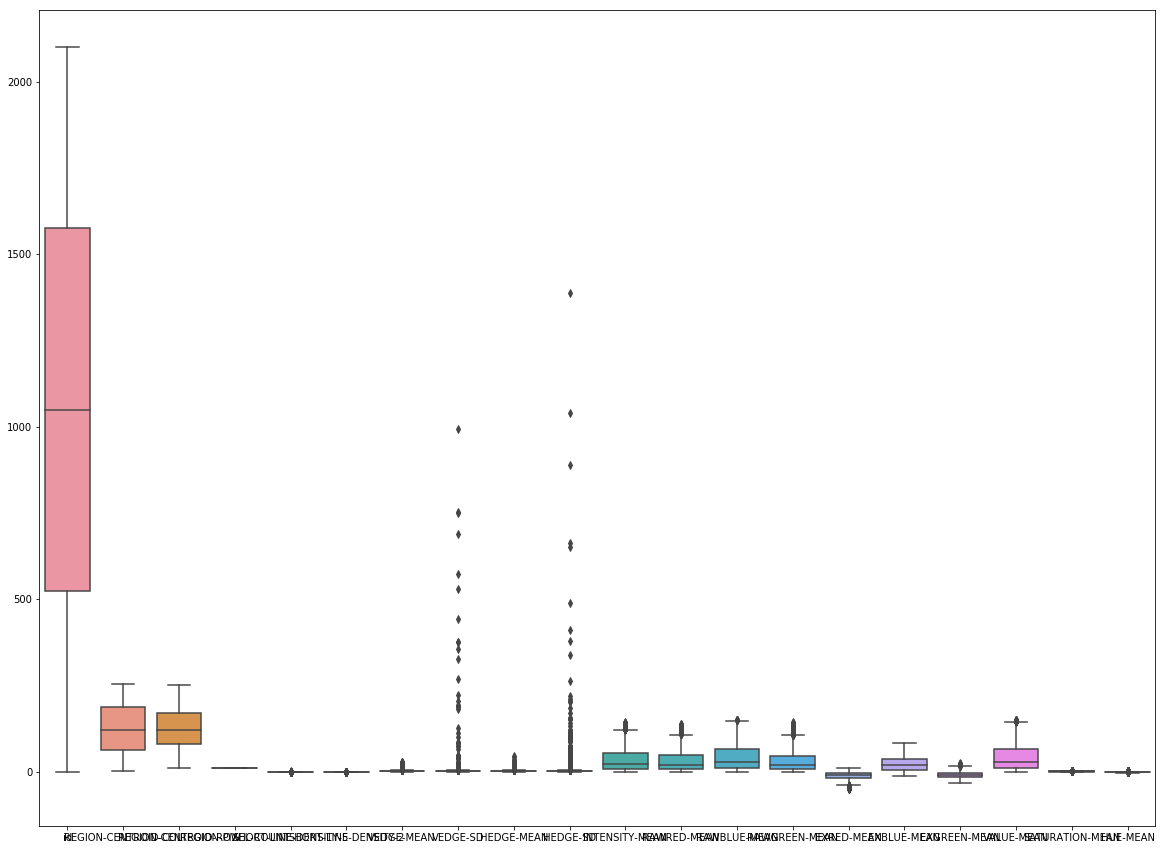

In [21]:
sns.boxplot(data=image_test_df)

### Z-Score

In [22]:
## to look for the outliers using the Z-Score

import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(image_test_df):
    
    threshold=3
    mean_1 = np.mean(image_test_df)
    std_1 =np.std(image_test_df)
    
    
    for y in image_test_df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [23]:
import numpy as np

def outliers_z_score(image_test_df):
    threshold = 3

    mean_y = np.mean(image_test_df)
    stdev_y = np.std(image_test_df)
    z_scores = [(y - mean_y) / stdev_y for y in image_test_df]
    return np.where(np.abs(z_scores) > threshold)

#### modified z-score

In [24]:
import numpy as np

def outliers_modified_z_score(image_test_df):
    threshold = 3.5

    median_y = np.median(image_test_df)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in image_test_df])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in image_class_df]
    return np.where(np.abs(modified_z_scores) > threshold)

### IQR Method

In [27]:
import numpy as np

def outliers_iqr(image_test_df):
    quartile_1, quartile_3 = np.percentile(image_test_df, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((image_class_df > upper_bound) | (image_test_df < lower_bound))

### export to csv

In [28]:
image_class_df.to_csv("clean_image.csv", sep="|")

## train.csv

In [30]:
image_train_df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,123.0,152.0,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,226.0,110.0,9,0.0,0.0,0.333333,0.088889,0.500000,0.211111,1.666667,0.111111,4.444445,0.444444,-4.666666,8.333333,-3.666667,4.444445,0.977778,-2.155984,1
2,121.0,60.0,9,0.0,0.0,2.277778,2.329629,2.888889,2.874074,26.740740,24.666666,35.222220,20.333334,-6.222222,25.444445,-19.222221,35.222220,0.422300,-1.776113,2
3,96.0,84.0,9,0.0,0.0,1.500000,1.277777,1.611111,2.285188,23.851852,23.555555,30.000000,18.000000,-0.888889,18.444445,-17.555555,30.000000,0.398791,-1.598867,2
4,103.0,64.0,9,0.0,0.0,0.666667,0.699205,1.333331,0.918936,108.777780,96.333336,126.222220,103.777780,-37.333332,52.333332,-15.000000,126.222220,0.236797,-2.355443,3


In [31]:
image_train_df.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397,3.000000
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405,2.004779
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950,0.000000
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112,1.000000
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163,3.000000
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800,5.000000
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931,6.000000


In [33]:
image_train_df.shape

(210, 20)

In [34]:
image_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 20 columns):
REGION-CENTROID-COL     210 non-null float64
REGION-CENTROID-ROW     210 non-null float64
REGION-PIXEL-COUNT      210 non-null int64
SHORT-LINE-DENSITY-5    210 non-null float64
SHORT-LINE-DENSITY-2    210 non-null float64
VEDGE-MEAN              210 non-null float64
VEDGE-SD                210 non-null float64
HEDGE-MEAN              210 non-null float64
HEDGE-SD                210 non-null float64
INTENSITY-MEAN          210 non-null float64
RAWRED-MEAN             210 non-null float64
RAWBLUE-MEAN            210 non-null float64
RAWGREEN-MEAN           210 non-null float64
EXRED-MEAN              210 non-null float64
EXBLUE-MEAN             210 non-null float64
EXGREEN-MEAN            210 non-null float64
VALUE-MEAN              210 non-null float64
SATURATION-MEAN         210 non-null float64
HUE-MEAN                210 non-null float64
CLASS                   210 non-null int64

### Check for Nan

In [35]:
image_train_df.isnull().values.any()

False